# Diabetes Feature Engineering

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Task 1: 
Exploratory Data Analysis.

Step 1: Examine the overall picture.

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
def check_df(dataframe, head=7, tail=7):
    '''
    Prints the general information about the given dataframe e.g. shape, head,
    tail, info, descriptive statistics, etc.

    Parameters
    ----------
    dataframe : DataFrame
        The dataframe that we want to have general information about.
    head: int
        Prints the first n rows of the dataframe.
    tail: int
        Prints the last n rows of the dataframe.
    '''
    print('####### Shape #######')
    print(dataframe.shape)
    print('####### Info #######')
    print(dataframe.info())
    print('####### Head #######')
    print(dataframe.head(head))
    print('####### Tail #######')
    print(dataframe.tail(tail))
    print('####### Descriptive Statistics #######')
    print(dataframe.describe([0.05, 0.25, 0.50, 0.75 ,0.95, 0.99]).T)
    print('####### NA #######')
    print(dataframe.isnull().sum())
    print('####### Number of Unique Values #######')
    print(dataframe.nunique())


check_df(df)

####### Shape #######
(768, 9)
####### Info #######
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
####### Head #######
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             3

Step 2: Capture the numeric and categorical variables.

In [4]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    '''
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included.
    
    Parameters
    ----------
    dataframe : DataFrame
        The dataframe containing the data.
    cat_th : int, optional
        Class threshold value for variables that appear numerical but are categorical.
    car_th : int, optional
        Class threshold value for variables that appear categorical but are cardinal.

    Returns
    -------
    cat_cols: list
        Categorical variable list.
    num_cols: list
        Numerical variable list.
    cat_but_car: list
        List of cardinal variables appearing categorical.

    Notes
    -----
    Total number of variables: cat_cols + num_cols + cat_but_car
    num_but_cat inside cat_cols
    '''
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != 'O']
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Report
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [5]:
print('Categorical Variables:', cat_cols, 
      '\nNumerical Variables:', num_cols, 
      '\nCategorical but Cardinal Variables:', cat_but_car)

Categorical Variables: ['Outcome'] 
Numerical Variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 
Categorical but Cardinal Variables: []


Step 3: Analyze the numerical and categorical variables.

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


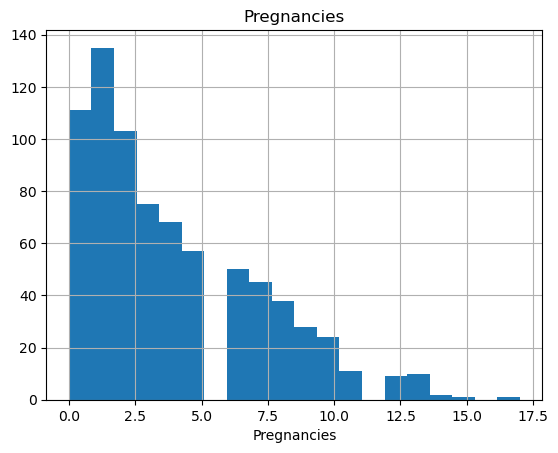

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


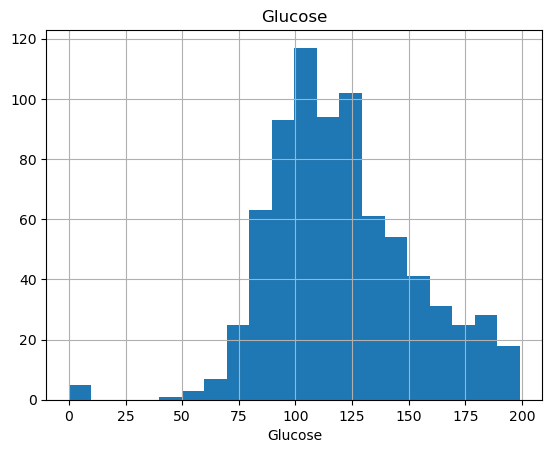

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


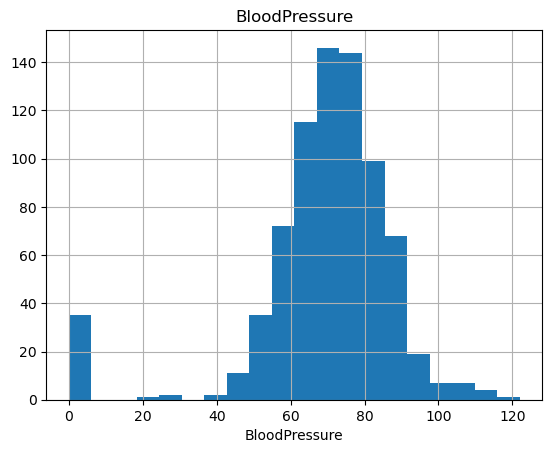

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


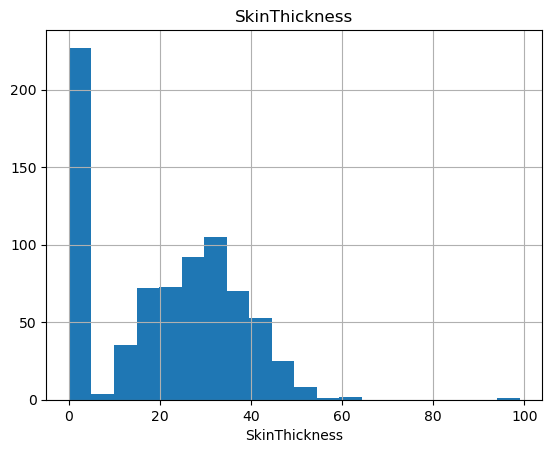

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


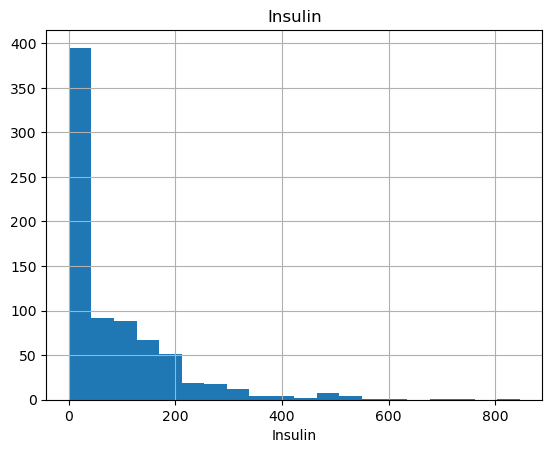

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


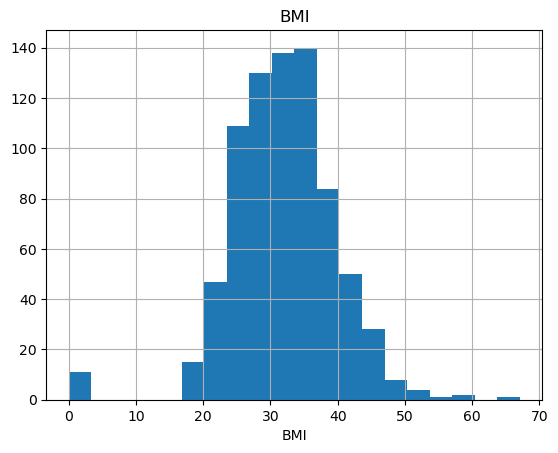

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


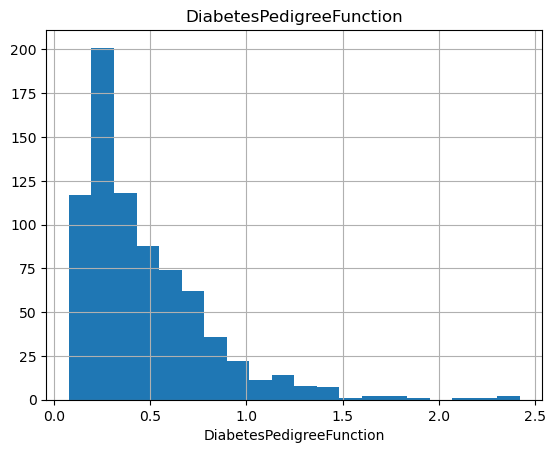

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


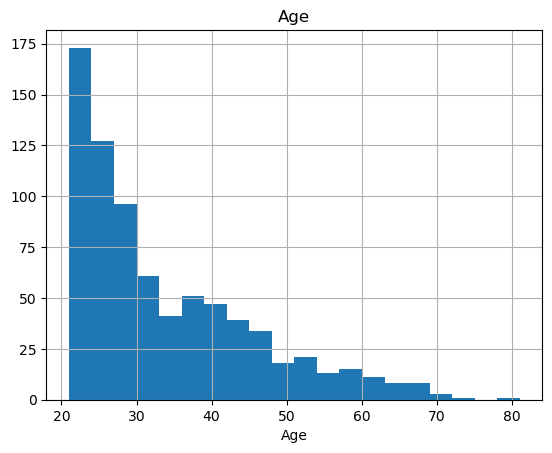

In [6]:
# Numerical variables
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


for col in num_cols:
    num_summary(df, col, plot=True)

   Outcome  Ratio
0      500 65.104
1      268 34.896
##########################################


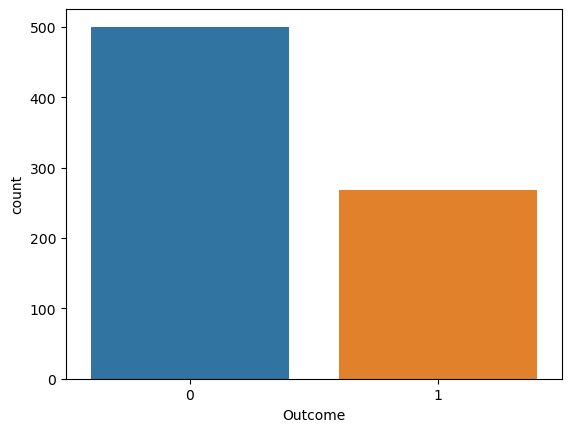

In [7]:
# Categorical variables
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col, plot=True)

Step 4: Perform target variable analysis (The mean of the target variable according to the categorical variables, the mean of the numeric variables according to the target variable).

In [8]:
# Target variable
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
# Analysis of numerical variables according to target variable
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: 'mean'}), end='\n\n\n')


for col in num_cols:
    target_summary_with_num(df, 'Outcome', col)

         Pregnancies
Outcome             
0              3.298
1              4.866


         Glucose
Outcome         
0        109.980
1        141.257


         BloodPressure
Outcome               
0               68.184
1               70.825


         SkinThickness
Outcome               
0               19.664
1               22.164


         Insulin
Outcome         
0         68.792
1        100.336


           BMI
Outcome       
0       30.304
1       35.143


         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


           Age
Outcome       
0       31.190
1       37.067




Step 5: Perform outlier analysis.

In [10]:
# Outlier thresholds
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [11]:
# Check outlier
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


Step 6: Perform missing value analysis.

In [12]:
# Variables with missing values
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end='\n')

    if na_name:
        return na_columns


na_cols = missing_values_table(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [13]:
# Relationship of missing values with the target variable
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains('_NA_')].columns
    for col in na_flags:
        print(pd.DataFrame({
            'COUNT': temp_df.groupby(col)[target].count(),
            'TARGET_MEAN': temp_df.groupby(col)[target].mean()}), end='\n\n\n')


missing_vs_target(df, 'Outcome', na_cols)

Step 7: Perform correlation analysis.

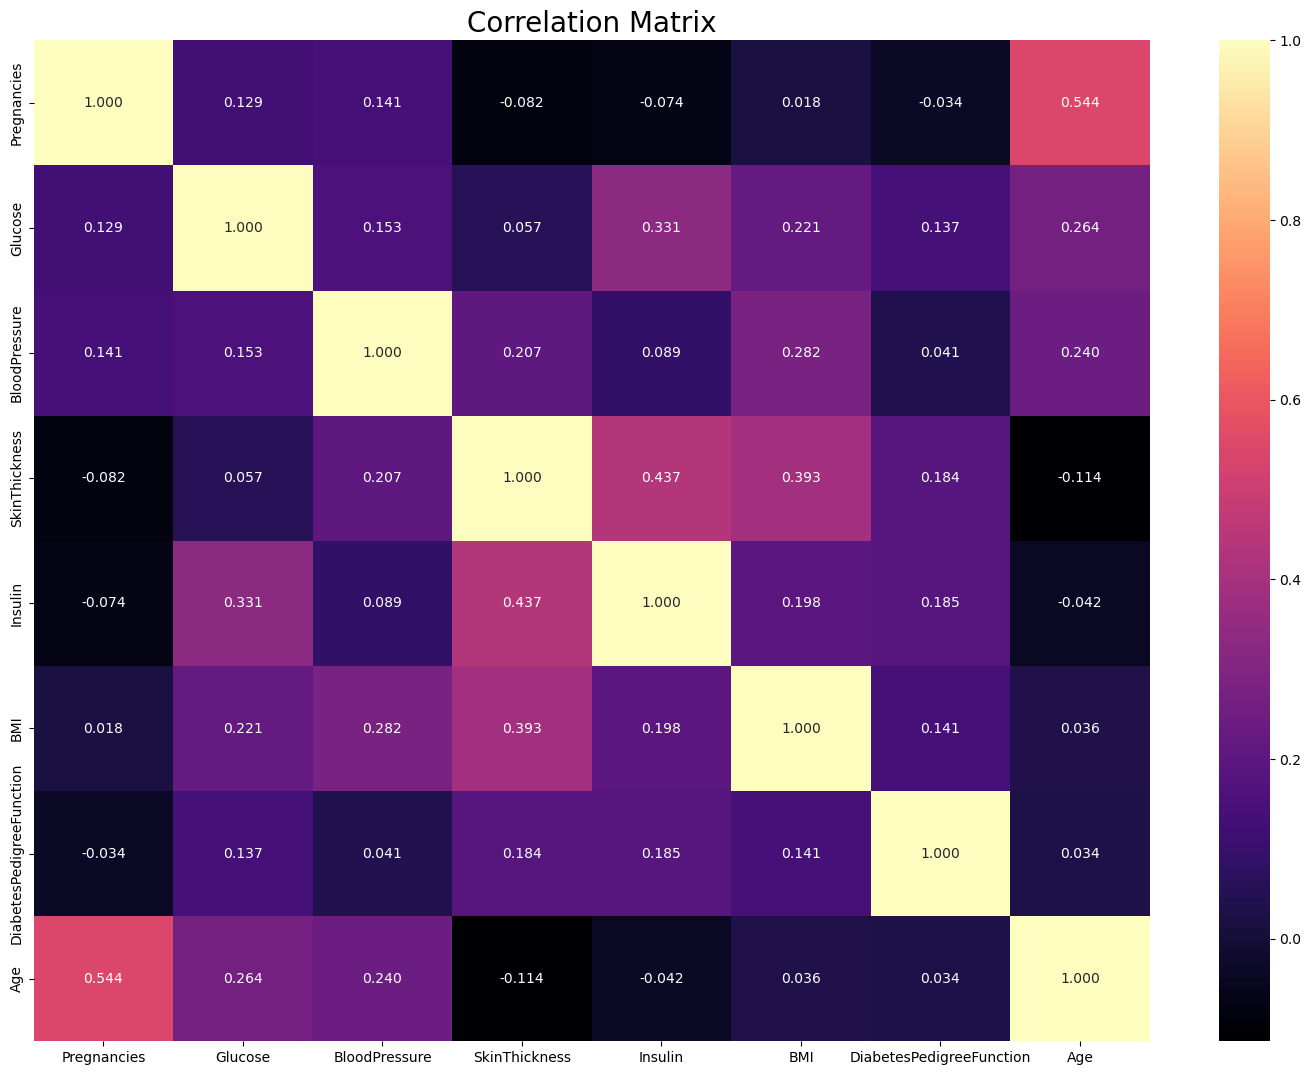

In [14]:
# Numerical variables correlation
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.3f', ax=ax, cmap='magma')
ax.set_title('Correlation Matrix', fontsize=20)
plt.show()

In [15]:
# Target variable correlation with numerical variables
df[num_cols].corrwith(df['Outcome']).sort_values(ascending=False)

Glucose                    0.467
BMI                        0.293
Age                        0.238
Pregnancies                0.222
DiabetesPedigreeFunction   0.174
Insulin                    0.131
SkinThickness              0.075
BloodPressure              0.065
dtype: float64

# Base Model

In [16]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f'Accuracy: {round(accuracy_score(y_pred, y_test), 3)}')
print(f'Recall: {round(recall_score(y_pred, y_test), 3)}')
print(f'Precision: {round(precision_score(y_pred, y_test), 3)}')
print(f'F1: {round(f1_score(y_pred, y_test), 3)}')
print(f'AUC: {round(roc_auc_score(y_pred, y_test), 3)}')

Accuracy: 0.786
Recall: 0.8
Precision: 0.561
F1: 0.66
AUC: 0.79


   Value                   Feature
1  0.256                   Glucose
5  0.162                       BMI
6  0.143  DiabetesPedigreeFunction
7  0.136                       Age
2  0.086             BloodPressure
0  0.084               Pregnancies
4  0.067                   Insulin
3  0.066             SkinThickness


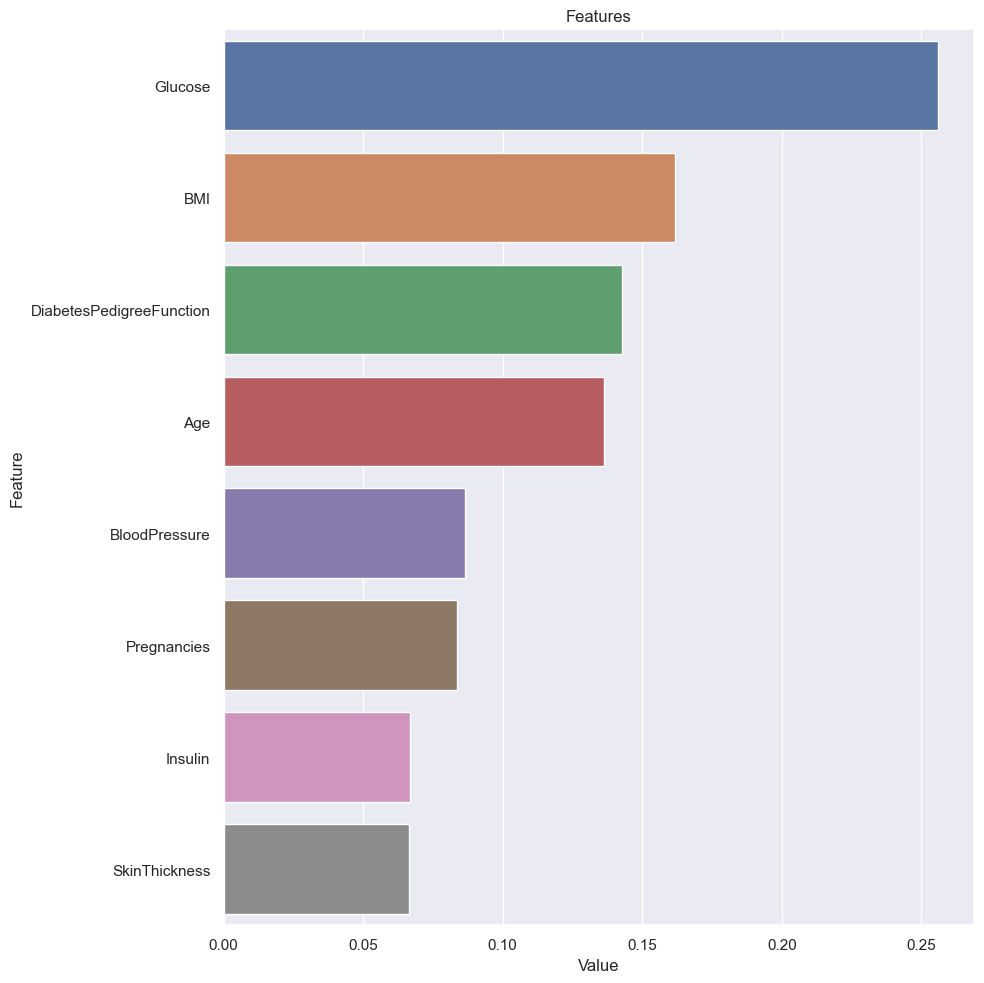

In [18]:
# Plot importance
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values('Value',ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value',
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X)

# Task 2: 
Feature Engineering.

Step 1: Take necessary actions for missing and outlier values. There are no missing observations in the data set, but 'Glucose', 'Insulin' etc. observation units containing a value of 0 in the variables may represent the missing value. 

For Example: A person's 'Glucose' or 'Insulin' value will not be 0. Considering this situation, you can assign the 0 values ​​to the relevant values ​​as 'NaN' and then apply the operations to the missing values.

- Missing Values

In [19]:
# It is known that variable values ​​other than Pregnancies and Outcome cannot be 0 in a human.
# Therefore, an action decision should be taken regarding these values. Values ​​that are 0 can be assigned NaN.
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ['Pregnancies', 'Outcome'])]
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [20]:
# Assign 'NaN' to values ​​that are 0
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
na_cols = missing_values_table(df, True)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


In [22]:
missing_vs_target(df, 'Outcome', na_cols)

                 COUNT  TARGET_MEAN
Glucose_NA_FLAG                    
0                  763        0.349
1                    5        0.400


                       COUNT  TARGET_MEAN
BloodPressure_NA_FLAG                    
0                        733        0.344
1                         35        0.457


                       COUNT  TARGET_MEAN
SkinThickness_NA_FLAG                    
0                        541        0.333
1                        227        0.388


                 COUNT  TARGET_MEAN
Insulin_NA_FLAG                    
0                  394        0.330
1                  374        0.369


             COUNT  TARGET_MEAN
BMI_NA_FLAG                    
0              757        0.351
1               11        0.182




In [23]:
# Fill missing values
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

In [24]:
missing_values_table(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

- Outliers

In [25]:
# Replacing with thresholds
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(df, col)

In [26]:
# Check outlier
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


Step 2: Create new variables.

In [27]:
# Age
df.loc[(df['Age'] >= 21) & (df['Age'] < 50), 'NEW_AGE'] = 'mature'
df.loc[(df['Age'] >= 50), 'NEW_AGE'] = 'senior'

In [28]:
# BMI (Body Mass Index)
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'normalweight', 'overweight', 'obese'])

In [29]:
# Glucose 
df['NEW_GLUCOSE'] = pd.cut(x=df['Glucose'], bins=[0, 140, 200, 300], labels=['normal', 'prediabetes', 'diabetes'])

In [30]:
# Insulin
def set_insulin(dataframe, col_name='Insulin'):
    if 16 <= dataframe[col_name] <= 166:
        return 'normal'
    else:
        return 'abnormal'


df['NEW_INSULIN'] = df.apply(set_insulin, axis=1)

In [31]:
# BMI & Age
df.loc[((df['BMI'] >= 18.5) & (df['BMI'] < 25)) & ((df['Age'] >= 21) & (df['Age'] < 50)), 'NEW_AGE_BMI'] = 'normalweight_mature'
df.loc[((df['BMI'] >= 18.5) & (df['BMI'] < 25)) & (df['Age'] >= 50), 'NEW_AGE_BMI'] = 'normalweight_senior'

df.loc[(df['BMI'] < 18.5) & ((df['Age'] >= 21) & (df['Age'] < 50)), 'NEW_AGE_BMI'] = 'underweight_mature'
df.loc[(df['BMI'] < 18.5) & (df['Age'] >= 50), 'NEW_AGE_BMI'] = 'underweight_senior'

df.loc[((df['BMI'] >= 25) & (df['BMI'] < 30)) & ((df['Age'] >= 21) & (df['Age'] < 50)), 'NEW_AGE_BMI'] = 'overweight_mature'
df.loc[((df['BMI'] >= 25) & (df['BMI'] < 30)) & (df['Age'] >= 50), 'NEW_AGE_BMI'] = 'overweight_senior'

df.loc[(df['BMI'] > 18.5) & ((df['Age'] >= 21) & (df['Age'] < 50)), 'NEW_AGE_BMI'] = 'obese_mature'
df.loc[(df['BMI'] > 18.5) & (df['Age'] >= 50), 'NEW_AGE_BMI'] = 'obese_senior'


In [32]:
# Glucose & Age
df.loc[(df['Glucose'] < 70) & ((df['Age'] >= 21) & (df['Age'] < 50)), 'NEW_AGE_GLUCOSE'] = 'low_mature'
df.loc[(df['Glucose'] < 70) & (df['Age'] >= 50), 'NEW_AGE_GLUCOSE'] = 'low_senior'

df.loc[((df['Glucose'] >= 70) & (df['Glucose'] < 100)) & ((df['Age'] >= 21) & (df['Age'] < 50)), 'NEW_AGE_GLUCOSE'] = 'normal_mature'
df.loc[((df['Glucose'] >= 70) & (df['Glucose'] < 100)) & (df['Age'] >= 50), 'NEW_AGE_GLUCOSE'] = 'normal_senior'

df.loc[((df['Glucose'] >= 100) & (df['Glucose'] <= 125)) & ((df['Age'] >= 21) & (df['Age'] < 50)), 'NEW_AGE_GLUCOSE'] = 'hidden_mature'
df.loc[((df['Glucose'] >= 100) & (df['Glucose'] <= 125)) & (df['Age'] >= 50), 'NEW_AGE_GLUCOSE'] = 'hidden_senior'

df.loc[(df['Glucose'] > 125) & ((df['Age'] >= 21) & (df['Age'] < 50)), 'NEW_AGE_GLUCOSE'] = 'high_mature'
df.loc[(df['Glucose'] > 125) & (df['Age'] >= 50), 'NEW_AGE_GLUCOSE'] = 'high_senior'

In [33]:
# Glucose * Insulin
df['NEW_GLUCOSE*INSULIN'] = df['Glucose'] * df['Insulin']

In [34]:
# Glucose * Pregnancies
df['NEW_GLUCOSE*PREGNANCIES'] = df['Glucose'] * df['Pregnancies']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    float64 
 8   Outcome                   768 non-null    int64   
 9   NEW_AGE                   768 non-null    object  
 10  NEW_BMI                   768 non-null    category
 11  NEW_GLUCOSE               768 non-null    category
 12  NEW_INSULIN               768 non-null    object  
 13  NEW_AGE_BMI               768 non-null    object  

Step 3: Perform the encoding operations.

In [36]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 17
cat_cols: 7
num_cols: 10
cat_but_car: 0
num_but_cat: 3


- Label Encoding

In [37]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [38]:
binary_cols = [col for col in df.columns if df[col].dtypes == 'O' and df[col].nunique() == 2]
binary_cols

['NEW_AGE', 'NEW_INSULIN']

In [39]:
for col in binary_cols:
    label_encoder(df, col)

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE,NEW_BMI,NEW_GLUCOSE,NEW_INSULIN,NEW_AGE_BMI,NEW_AGE_GLUCOSE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,1,obese,prediabetes,1,obese_senior,high_senior,18500.000,888.000
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,0,overweight,normal,1,obese_mature,normal_mature,10625.000,85.000
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,0,normalweight,prediabetes,1,obese_mature,high_mature,22875.000,1464.000
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,0,overweight,normal,1,obese_mature,normal_mature,8366.000,89.000
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1,0,obese,normal,0,obese_mature,high_mature,23016.000,0.000


- One-Hot Encoding

In [41]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ['Outcome']]
cat_cols

['NEW_AGE_BMI', 'NEW_AGE_GLUCOSE', 'NEW_BMI', 'NEW_GLUCOSE']

In [42]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df = one_hot_encoder(df, cat_cols, drop_first=True)

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE,NEW_INSULIN,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_obese_senior,NEW_AGE_BMI_underweight_mature,NEW_AGE_GLUCOSE_hidden_senior,NEW_AGE_GLUCOSE_high_mature,NEW_AGE_GLUCOSE_high_senior,NEW_AGE_GLUCOSE_low_mature,NEW_AGE_GLUCOSE_low_senior,NEW_AGE_GLUCOSE_normal_mature,NEW_AGE_GLUCOSE_normal_senior,NEW_BMI_normalweight,NEW_BMI_overweight,NEW_BMI_obese,NEW_GLUCOSE_prediabetes,NEW_GLUCOSE_diabetes
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,1,1,18500.000,888.000,1,0,0,0,1,0,0,0,0,0,0,1,1,0
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,0,1,10625.000,85.000,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,0,1,22875.000,1464.000,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,0,1,8366.000,89.000,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1,0,0,23016.000,0.000,0,0,0,1,0,0,0,0,0,0,0,1,0,0


Step 4: Standardize numeric variables.

In [44]:
s_scaler = StandardScaler()
df[num_cols] = s_scaler.fit_transform(df[num_cols])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE,NEW_INSULIN,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_obese_senior,NEW_AGE_BMI_underweight_mature,NEW_AGE_GLUCOSE_hidden_senior,NEW_AGE_GLUCOSE_high_mature,NEW_AGE_GLUCOSE_high_senior,NEW_AGE_GLUCOSE_low_mature,NEW_AGE_GLUCOSE_low_senior,NEW_AGE_GLUCOSE_normal_mature,NEW_AGE_GLUCOSE_normal_senior,NEW_BMI_normalweight,NEW_BMI_overweight,NEW_BMI_obese,NEW_GLUCOSE_prediabetes,NEW_GLUCOSE_diabetes
0,0.640,0.866,-0.032,0.680,-0.183,0.167,0.468,1.426,1,1,1,0.024,0.882,1,0,0,0,1,0,0,0,0,0,0,1,1,0
1,-0.845,-1.205,-0.528,-0.011,-0.183,-0.852,-0.365,-0.191,0,0,1,-0.503,-0.858,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1.234,2.017,-0.694,-0.011,-0.183,-1.333,0.604,-0.106,1,0,1,0.317,2.129,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,-0.845,-1.074,-0.528,-0.702,-0.553,-0.634,-0.921,-1.042,0,0,1,-0.654,-0.849,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,-1.142,0.504,-2.679,0.680,0.331,1.549,5.485,-0.020,1,0,0,0.326,-1.042,0,0,0,1,0,0,0,0,0,0,0,1,0,0


Step 5: Create the model.

In [45]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f'Accuracy: {round(accuracy_score(y_pred, y_test), 3)}')
print(f'Recall: {round(recall_score(y_pred, y_test), 3)}')
print(f'Precision: {round(precision_score(y_pred, y_test), 3)}')
print(f'F1: {round(f1_score(y_pred, y_test), 3)}')
print(f'AUC: {round(roc_auc_score(y_pred, y_test), 3)}')

# Initial Values
# Accuracy: 0.771
# Recall: 0.706
# Precision: 0.593
# F1: 0.644
# AUC: 0.752

Accuracy: 0.792
Recall: 0.805
Precision: 0.579
F1: 0.673
AUC: 0.796


    Value                         Feature
1   0.142                         Glucose
10  0.127             NEW_GLUCOSE*INSULIN
5   0.101                             BMI
6   0.099        DiabetesPedigreeFunction
7   0.097                             Age
11  0.093         NEW_GLUCOSE*PREGNANCIES
2   0.064                   BloodPressure
4   0.053                         Insulin
3   0.051                   SkinThickness
24  0.049         NEW_GLUCOSE_prediabetes
0   0.048                     Pregnancies
15  0.016     NEW_AGE_GLUCOSE_high_mature
23  0.013                   NEW_BMI_obese
19  0.012   NEW_AGE_GLUCOSE_normal_mature
22  0.009              NEW_BMI_overweight
21  0.007            NEW_BMI_normalweight
9   0.006                     NEW_INSULIN
12  0.006        NEW_AGE_BMI_obese_senior
16  0.003     NEW_AGE_GLUCOSE_high_senior
8   0.003                         NEW_AGE
14  0.003   NEW_AGE_GLUCOSE_hidden_senior
20  0.001   NEW_AGE_GLUCOSE_normal_senior
17  0.000      NEW_AGE_GLUCOSE_low

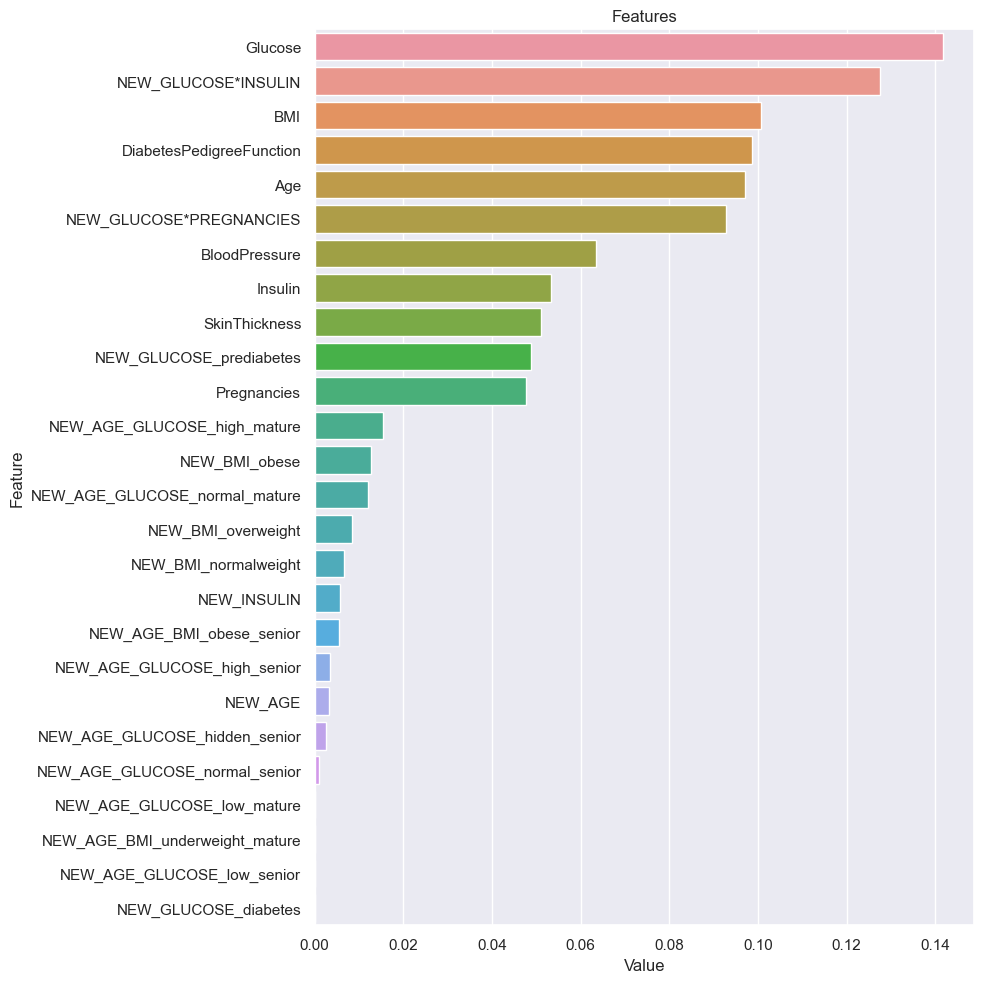

In [47]:
# Plot Importance
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values('Value',ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value',
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X)